<a href="https://colab.research.google.com/github/ribka-5/AI/blob/main/Tugas_Praktikum_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing,
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline

In [ ]:
url='https://drive.google.com/file/d/1RkYLZ6eqUemj_BteBFbLn2ZHSURzjvWt/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url,encoding='ISO-8859-1')
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


Pakai Unicode Decode dari data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [ ]:
df.shape

(500, 9)

In [ ]:
df.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [ ]:
df.isnull().sum().sort_values(ascending=False).head()

customer name      0
customer e-mail    0
country            0
gender             0
age                0
dtype: int64

In [ ]:
df.nunique().sort_values(ascending=True)

gender                   2
country                211
customer name          498
customer e-mail        500
age                    500
annual Salary          500
credit card debt       500
net worth              500
car purchase amount    500
dtype: int64

In [ ]:
df['gender'].value_counts()

1    253
0    247
Name: gender, dtype: int64

0 : Perempuan
1 : Laki-laki

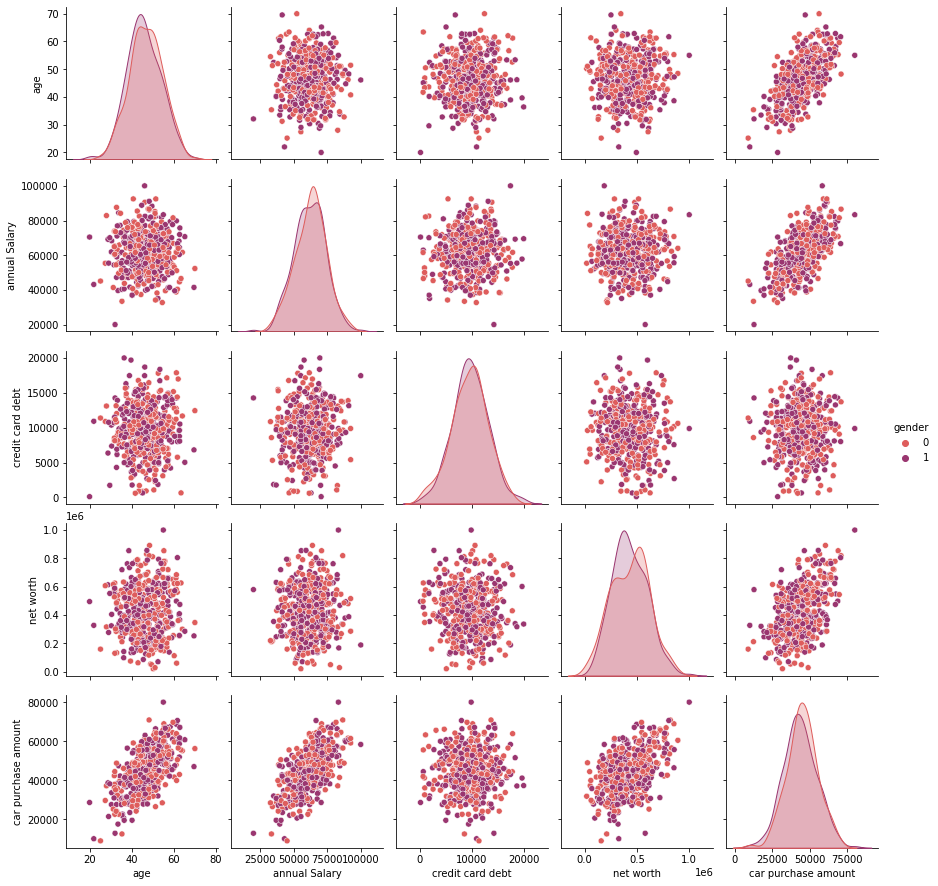

In [ ]:
sns.pairplot(df,hue='gender',palette='flare')

In [ ]:
df.drop(["customer name","customer e-mail","country"],axis=1,inplace=True)
df.head()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [ ]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
x_scaled = mms.fit_transform(x)
y_scaled = mms.fit_transform(y.values.reshape(-1,1))

Normalisasi data menggunakan metode minmax

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

ANN REGRESI untuk prediksi

In [ ]:
print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

x_train : (375, 5)
x_test : (125, 5)
y_train : (375,)
y_test : (125,)


Model dengan input 25, hidden layer 25, dan output 1

In [ ]:
#define the model
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(25, input_dim=5, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 25)                150       
                                                                 
 dense_34 (Dense)            (None, 25)                650       
                                                                 
 dense_35 (Dense)            (None, 1)                 26        
                                                                 
Total params: 826
Trainable params: 826
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')

Algoritma pengoptimalan yang akan digunakan adalah adam *(derived from adaptive moment estimation)* sebagai ganti dari prosedur stochastic gradient descent klasik untuk memperbarui weight network secara iteratif berdasarkan data training.

Loss function adalah sebuah fungsi yang digunakan untuk menghitung perbedaan antara keluaran yang dibuat oleh algoritma saat ini dengan keluaran yang diharapkan.
Karena akan dilakukan regresi maka loss function yang dipilih adalah mean square error (MSE)

Epoch (menentukan berapa kali model neural network telah melihat dataset secara keseluruhan). Epoch yang digunakan adalah 100

verbose=1 untuk menunjukkan animasi bar progress

In [ ]:
epochs_hist = model.fit(x_train,y_train,epochs=100,batch_size=50,verbose=1,validation_split=0.2)

Epoch 1/100
6/6 [==============================] - 1s 69ms/step - loss: 547788672.0000 - val_loss: 392627456.0000
Epoch 2/100
6/6 [==============================] - 0s 17ms/step - loss: 387821792.0000 - val_loss: 156513728.0000
Epoch 3/100
6/6 [==============================] - 0s 23ms/step - loss: 165997856.0000 - val_loss: 186719744.0000
Epoch 4/100
6/6 [==============================] - 0s 20ms/step - loss: 185306384.0000 - val_loss: 82103040.0000
Epoch 5/100
6/6 [==============================] - 0s 31ms/step - loss: 123091256.0000 - val_loss: 114720464.0000
Epoch 6/100
6/6 [==============================] - 0s 16ms/step - loss: 112265528.0000 - val_loss: 76078752.0000
Epoch 7/100
6/6 [==============================] - 0s 14ms/step - loss: 101512056.0000 - val_loss: 66119900.0000
Epoch 8/100
6/6 [==============================] - 0s 10ms/step - loss: 84103120.0000 - val_loss: 68094024.0000
Epoch 9/100
6/6 [==============================] - 0s 21ms/step - loss: 76381560.0000 - val_l

In [ ]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

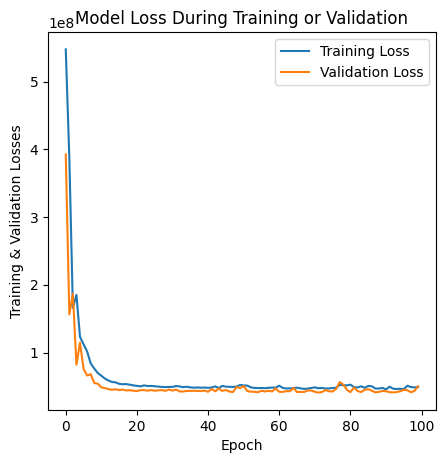

In [ ]:
plt.figure(figsize=(5,5),dpi=100)
plt.plot(epochs_hist.history["loss"])
plt.plot(epochs_hist.history["val_loss"])

plt.title('Model Loss During Training or Validation')
plt.ylabel('Training & Validation Losses')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'])

In [ ]:
X_random_sample = np.array([[1, 55, 65000, 11600, 562341]])
y_predict = model.predict(X_random_sample)

1/1 [==============================] - 0s 106ms/step


In [ ]:
y_predict.shape

(1, 1)

In [ ]:
print('Predicted Purchase Amount is =', y_predict[:,0])

Predicted Purchase Amount is = [51695.832]
